# What Makes a Movie Profitable? Indicators of Box Office Success




## Background ##

In 2016, the [global film industry](https://www.statista.com/topics/964/film/) generated 38 billion US dollars, and revenues are projected to increase to nearly 50 billion US dollars by 2020. However, although a highly profitable industry as a whole, every movie produced also requires a high level of investment from studios, producers, etc. with little guarantee that there will be a return on investment. A movie's profitability is increasingly elusive with the shift in consumer behavior towards media consumption and [rising marketing costs](http://www.hollywoodreporter.com/news/200-million-rising-hollywood-struggles-721818). 
 
The unpredicatability of a movie's profitability was highlighted recently with the failure of the movie ["The Great Wall"](http://www.hollywoodreporter.com/news/what-great-walls-box-office-flop-will-cost-studios-981602). Financed through a joint partnership between the US and China, the movie was expected to be a huge success. Nonetheless, the movie only made 34.8 million US dollars in the North American box office, in comparison with a production budget of 150 million US dollars. 

On the other hand, [Amazon](http://www.businessinsider.com/amazon-investing-well-over-3-billion-in-video-says-analyst-2016-12) has been investing over 3 billion US dollars annually in original content with various success stories such as their investment in "Manchester in the Sea", which recieved six Oscar nominations in 2017. 

The profitability of an individual film is highly unpredictable, but industry investors would be put at ease if there could be some understanding of whether their investments will be worthwhile. Therefore, we want to look at the best indicators to predict a film’s success. We define a film's success by its domestic box office revenue.

## Data ##

Data comes from the following website: https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

The "IMDB 5000 Movie Set" contains movie data for over 5000 movies made in the past 100 years. The information was scraped from IMDB's database, and attached as a CSV file. 

In this assignment, you are to identify what contributes a movie's success as the success is determined by its gross revenue

Specifically will focus on
   - (15 pts) - Budget vs. Gross Revenue 
   - (15 pts) - IMDB Ratings vs Gross Revenue 
   - (15 pts) - MPAA Ratings vs. Gross Revenue  
   - (15 pts) - Genre vs Gross Revenue     
   - (15 pts) - Director Popularity vs Gross Revenue 
   - (15 pts) - Star Power vs Gross Revenue        
   - (10 pts) and provide your opinion on what makes a movie successful 
                                                     

For this you'll use the pandas package and visualization tool of your choice

## Getting Started


In [1]:
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import time
import seaborn as sns
from pandas_datareader import wb, data as web


%matplotlib inline

In [2]:
df = pd.read_csv('movie_metadata.csv')

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
# Drop columns
df.drop(df.columns[[0,2,3,4,5,7,13,15,16,17,18,19,24,26,27]], axis=1, inplace=True)
list(df)

# Rename the Columns
df.columns = ['Director','Actor 1','Gross','Genre','Actor 2','Movie Name','Number of Votes','Actor 3','Country', 'Rating', 'Budget', 'Year', 'IMDB Score']

# Let's see what type variables are in our data frame
print('Variable dtypes:\n', df.dtypes, sep='')

# Get average values for numeric variables
df.mean()



# Sort the data by thir gross revenue
df = df.sort_values('Gross', ascending=False)
df.head(5)


# Let's clean up the data set a bit more

# Remove duplicate movie names
# Exclude data without Gross and Budget values
# Reset the index 

df = df.drop_duplicates('Movie Name')
df = df[pd.notnull(df['Gross']) & pd.notnull(df['Budget'])]

df = df.set_index('Movie Name')
df.head()

# Year information has decimal numbers
df['Year'].head()



#change year to integer to get rid of decimal
df['Year'] = df['Year'].astype(int)

# Review our data types once more
print('Variable dtypes:\n', df.dtypes, sep='')




# Notice that the movies with highest budget are from Korea, Hungary and Japan,


df_bybudget = df.sort_values('Budget', ascending=False)
df_bybudget['Country'].head(5)

# Because of currency these movies will skew our analysis
# To adjust, choose data from the US and UK movie industries only. 
# We want to include UK movies because the Bond movies and Harry Potter movies, 
# are listed as UK movies
# Furthermore, the difference between dollar and pound is in orders of magnitude
vlist = ['USA', 'UK']
df = df[df['Country'].isin(vlist)]


# Build a function to adjust dollar value in millions
def millions(number):
    '''show dollar value in millions'''
    return number*(1/1000000)

#Use this millions function to create new columns 
#   - "Budget_inmillion" and 
#   - "Gross_inmillions"
budgetmillions = millions(df['Budget'])
grossmillions = millions(df['Gross'])
df = df.assign(Budget_inmillions=budgetmillions)
df = df.assign(Gross_inmillions=grossmillions)

# New column names are:
list(df)

# Now we can get rid of the old columns "Budget" and "Gross"
df = df.drop(['Budget','Gross'], 1)

# Rename the new values in millions as:
#  "Budget_inmillions"  ---> "Budget"
#  "Gross_inmillions"   ---> "Gross"
df = df.rename(columns={'Budget_inmillions': 'Budget', 'Gross_inmillions': 'Gross'})
# Let's look and our list of variables and their types
print('Variable dtypes:\n', df.dtypes, sep='')

Variable dtypes:
Director            object
Actor 1             object
Gross              float64
Genre               object
Actor 2             object
Movie Name          object
Number of Votes      int64
Actor 3             object
Country             object
Rating              object
Budget             float64
Year               float64
IMDB Score         float64
dtype: object
Variable dtypes:
Director            object
Actor 1             object
Gross              float64
Genre               object
Actor 2             object
Number of Votes      int64
Actor 3             object
Country             object
Rating              object
Budget             float64
Year                 int64
IMDB Score         float64
dtype: object
Variable dtypes:
Director            object
Actor 1             object
Genre               object
Actor 2             object
Number of Votes      int64
Actor 3             object
Country             object
Rating              object
Year                 int64
IMD

In [5]:
# Create a new data frame called df_budget that has only
# - Year
# - Budget, and
# - Gross
# Drop every other column

df_budget = df.drop(['Director','Actor 1','Actor 2','Actor 3','Genre','Country','Rating','IMDB Score','Number of Votes'], 1)



0.42452350874230294

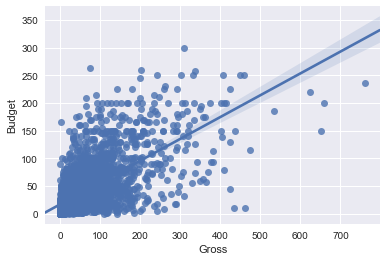

In [6]:
## Budget vs. Gross Revenue
# Look at the relationship between Budget and Gross profit. 
# Big Hollywood studios tend to invest millions of dollars in productions they want to see perform well. 
# Assumption is that movies with big budgets often become global blockbusters, 
# given the amount invested in special effects, marketing & advertising, etc. 
# Let's see if this is actually true

sns.regplot(x = 'Gross', y = 'Budget', data=df_budget)

# If we run regression on the Budget vs Gross income data, 
# rSquare value is although positive but not that convincing
import numpy as np

import statsmodels.formula.api as smf
# regression = sm.ols(y=df_budget['Budget'],x=df_budget['Gross'])
regression = smf.ols('Budget ~ Gross ', data=df_budget).fit()
regression.rsquared

# This indicates that the higher the average production budget, 
# the higher the movie's box office performance. 
# This can be explained by a number of factors: 
#   - increased spending on marketing, 
#   - expensive special effects to attract a wider audience, 
#   - elaborate action sequences, 
#   - famous high-paid actors, etc. 

# However, one issue in our data set is that we didn't account for inflation, 
# and considering it includes movies from the 1930s onwards, 
# it wouldn't make sense to compare old movies to newer ones. 


0.509812878838517

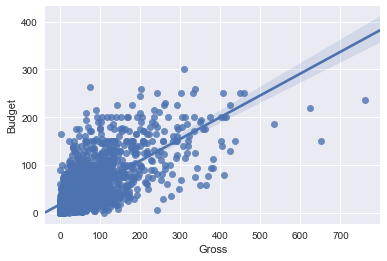

In [7]:
### Focusing on data post-2000

# let's focus on movies post-2000. 
# Since it's not long period of time, the impact of inflation will not bw that pronounced


# Start with sorting the df_budget table by year
df_budget = df_budget.sort_values('Year', ascending=False)
df_budget.head()

# Select only the movies from 2000 to 2017
yearlist = range(2000,2017)
df_newbudget = df_budget[df_budget['Year'].isin(yearlist)]


# Look at the scatter plot
sns.regplot(x = 'Gross', y = 'Budget', data=df_newbudget)


regression = smf.ols('Budget ~ Gross', data=df_newbudget).fit()
regression.rsquared

# rSquared value now has increased to 0.51, 
# meaning that we're on the right path 
# there is a correlation between budget and box office grosses, 
# confirming our initital hypothesis that higher production costs, on average, 
# lead to higher revenues (given the amount invested in star power, marketing, etc.) 

## (1) Budget vs. Gross Revenue

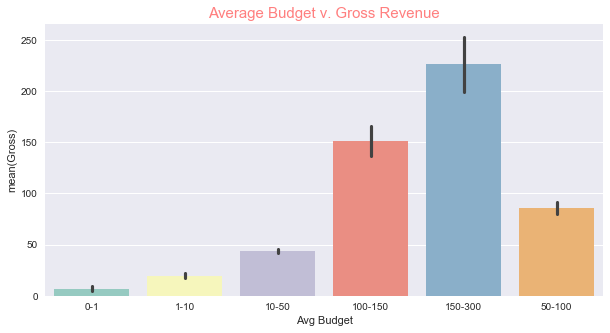

In [8]:
# To better visualize this relationship, let's bin budget ranges into buckets 
# (0-1, 1-10, 10-50, 50-100, 100-150, and 150-300) and 
# add a new column called "Avg Budget" with these new values

bins = [0,1,10,50,100,150,301]
group_names = ['0-1','1-10','10-50','50-100','100-150','150-300']

df_budget = df_budget.sort_values('Budget', ascending=False)
categories = pd.cut(df_budget['Budget'], bins, labels=group_names)
df_budget['Avg Budget'] = pd.cut(df_budget['Budget'], bins, labels=group_names)

# lets look at how many movies are in each budget range
pd.value_counts(df_budget['Avg Budget'])

# Generate a bar chart of gross revenues.
f, ax = plt.subplots(figsize=(10, 5))
Budget = sns.barplot(x="Avg Budget", y="Gross", data=df_budget, palette="Set3")
Budget.axes.set_title('Average Budget v. Gross Revenue', fontsize=15,color="r",alpha=0.5)

## (2) IMDB Ratings vs Gross Revenue

-- Provide your solution

In [9]:
#Sort IMDB Score and check sample data
df = df.sort_values('IMDB Score', ascending=True)
df['IMDB Score'].head()

Movie Name
Justin Bieber: Never Say Never     1.6
Disaster Movie                     1.9
Who's Your Caddy?                  2.0
Crossover                          2.1
From Justin to Kelly               2.1
Name: IMDB Score, dtype: float64

In [10]:
df.head()

,Director,Actor 1,Genre,Actor 2,Number of Votes,Actor 3,Country,Rating,Year,IMDB Score,Budget,Gross
Movie Name,,,,,,,,,,,,
Justin Bieber: Never Say Never,Jon M. Chu,Sean Kingston,Documentary|Music,Usher Raymond,74351,Boys II Men,USA,G,2011,1.6,13.0,73.000942
Disaster Movie,Jason Friedberg,Tony Cox,Comedy,Carmen Electra,74945,Ike Barinholtz,USA,PG-13,2008,1.9,25.0,14.174654
Who's Your Caddy?,Don Michael Paul,Faizon Love,Comedy|Sport,Jeffrey Jones,13815,Lil' Wayne,USA,PG-13,2007,2.0,7.0,5.694308
Crossover,Preston A. Whitmore II,Wayne Brady,Action|Sport,Wesley Jonathan,8707,Eva Marcille,USA,PG-13,2006,2.1,5.6,7.009668
From Justin to Kelly,Robert Iscove,Kelly Clarkson,Comedy|Musical|Romance,Anika Noni Rose,23606,Brian Dietzen,USA,PG,2003,2.1,12.0,4.922166


In [11]:
#Normalise IMDB score. Bin rating into ranges.
bins = [0,1,2,3,4,5,6,7,8,9,10]
group_names = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10']
df['Normalised IMDB Score'] = pd.cut(df['IMDB Score'], bins, labels=group_names)

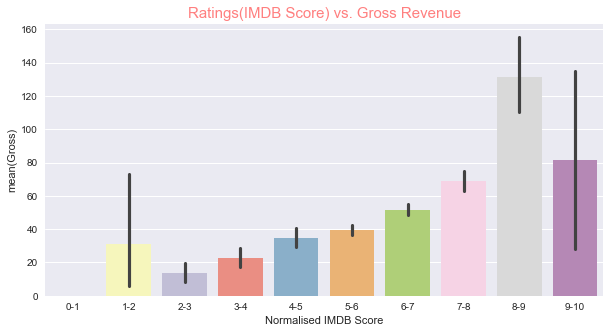

In [12]:
f, ax = plt.subplots(figsize = (10,5))
ratingVgross = sns.barplot(x="Normalised IMDB Score", y = "Gross", data = df, palette = "Set3")
ratingVgross.axes.set_title('Ratings(IMDB Score) vs. Gross Revenue', fontsize=15,color="r",alpha=0.5)
#Movies having IMDB Score higher than 8, does good business.

## (3) MPAA Ratings vs. Gross Revenue

-- Provide your solution

In [13]:
#Get the type different type of ratings
df.Rating.unique()

array(['G', 'PG-13', 'PG', 'R', 'Not Rated', nan, 'X', 'NC-17', 'Unrated',
       'Passed', 'GP', 'Approved', 'M'], dtype=object)

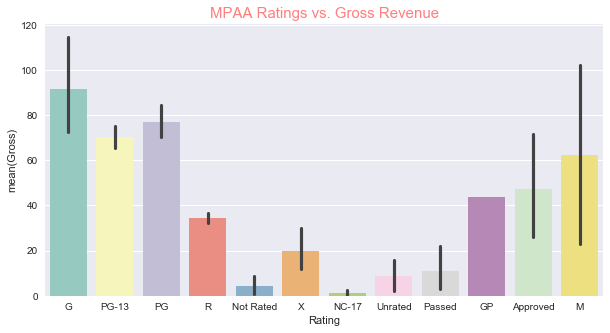

In [14]:
f, ax = plt.subplots(figsize = (10,5))
mratingVplot = sns.barplot(x="Rating", y = "Gross", data = df, palette = "Set3")
mratingVplot.axes.set_title('MPAA Ratings vs. Gross Revenue', fontsize=15,color="r",alpha=0.5)
#Movies with Rating G and 

In [15]:

df.head()

,Director,Actor 1,Genre,Actor 2,Number of Votes,Actor 3,Country,Rating,Year,IMDB Score,Budget,Gross,Normalised IMDB Score
Movie Name,,,,,,,,,,,,,
Justin Bieber: Never Say Never,Jon M. Chu,Sean Kingston,Documentary|Music,Usher Raymond,74351,Boys II Men,USA,G,2011,1.6,13.0,73.000942,1-2
Disaster Movie,Jason Friedberg,Tony Cox,Comedy,Carmen Electra,74945,Ike Barinholtz,USA,PG-13,2008,1.9,25.0,14.174654,1-2
Who's Your Caddy?,Don Michael Paul,Faizon Love,Comedy|Sport,Jeffrey Jones,13815,Lil' Wayne,USA,PG-13,2007,2.0,7.0,5.694308,1-2
Crossover,Preston A. Whitmore II,Wayne Brady,Action|Sport,Wesley Jonathan,8707,Eva Marcille,USA,PG-13,2006,2.1,5.6,7.009668,2-3
From Justin to Kelly,Robert Iscove,Kelly Clarkson,Comedy|Musical|Romance,Anika Noni Rose,23606,Brian Dietzen,USA,PG,2003,2.1,12.0,4.922166,2-3


In [16]:
#Create a function to split the column's data having '|' as delimiter
def expand_col(df_src, col, sep='|'): 
    di = {} # declare empty dictionary
    idx = 0
    for i in df_src.iterrows(): #iterrows() is used to iterate over dataframes
        d = i[1] #read 
        names = d[col].split(sep) # splits the column using '|' as the separator
        for name in names:
            # operate on a copy to not overwrite previous existing data 
            c = d.copy()
            c[col] = name
            di[idx] = c
            idx += 1
            
    df_new = pd.DataFrame(di).transpose()
    return df_new

In [17]:
#call function by passing the arguments of data frame and column.  
df_gen = expand_col(df, 'Genre')
df_gen.shape



(9771, 13)

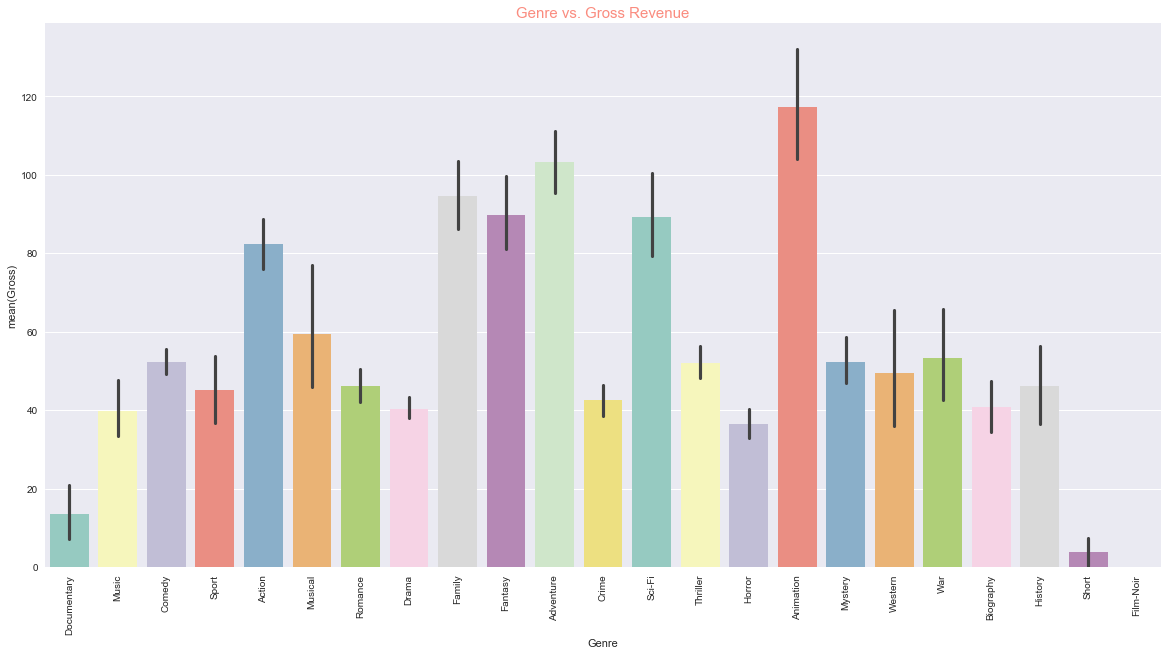

In [18]:
f, ax = plt.subplots(figsize = (20,10))
genreplot = sns.barplot(x="Genre", y = "Gross", data = df_gen, palette = "Set3")
plt.xticks(rotation=90)
genreplot.axes.set_title('Genre vs. Gross Revenue', fontsize=15,color="salmon",alpha=0.9)

## (5) Director Popularity vs Gross Revenue

- Our dataset does not contain any indicators of director popularity (the "Facebook Likes" column contains too many wrong or missing values). 
- Focus on the ones who directed the highest number of movies. Studios only hire directors to direct again if their movies have been successful in the past or if they are famous, with the hopes that the director will repeat his or her success or the value of their celebrity will attract enough attention to the movie to generate profit. 

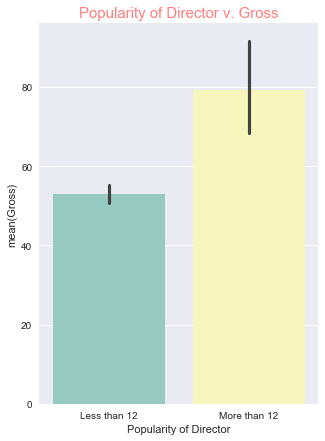

In [19]:
df_director = df.drop(['Actor 1','Actor 2','Actor 3','Number of Votes','Genre','Country','Rating','IMDB Score','Budget','Year'], 1)
df_director.head()

df_director['Value Counts'] = df_director.groupby('Director')['Director'].transform('count')
df_director.head()

df_director['Director'].value_counts()

df_director[df_director['Director'].str.contains("Steven Spielberg",na=False)].head()

bins = [0,12,30]
group_names = ['Less than 12','More than 12']
categories = pd.cut(df_director['Value Counts'], bins, labels=group_names)
df_director['Popularity of Director'] = pd.cut(df_director['Value Counts'], bins, labels=group_names)
categories.head(5)

pd.value_counts(df_director['Popularity of Director'])

f, ax = plt.subplots(figsize=(5, 7))
Fame = sns.barplot(x="Popularity of Director", y="Gross", data=df_director, palette="Set3")
Fame.axes.set_title('Popularity of Director v. Gross', fontsize=15,color="r",alpha=0.5)

In [20]:
df_director[df_director['Director'].str.contains("Steven Spielberg",na=False)].head()
#df_director.head()

,Director,Gross,Normalised IMDB Score,Value Counts,Popularity of Director
Movie Name,,,,,
Indiana Jones and the Kingdom of the Crystal Skull,Steven Spielberg,317.011114,6-7,24,More than 12
War of the Worlds,Steven Spielberg,234.277056,6-7,24,More than 12
The Lost World: Jurassic Park,Steven Spielberg,229.074524,6-7,24,More than 12
Hook,Steven Spielberg,119.654900,6-7,24,More than 12
The BFG,Steven Spielberg,52.792307,6-7,24,More than 12


## (6) Star Power vs Gross Revenue
Implement the same rationale for actors as we did for director to identify star power and provide your solution

In [21]:
#Remove unnecessary columns
df_star = df.drop(['Number of Votes','Genre','Country','Rating','IMDB Score','Budget','Year'], 1)
df_star.head()

,Director,Actor 1,Actor 2,Actor 3,Gross,Normalised IMDB Score
Movie Name,,,,,,
Justin Bieber: Never Say Never,Jon M. Chu,Sean Kingston,Usher Raymond,Boys II Men,73.000942,1-2
Disaster Movie,Jason Friedberg,Tony Cox,Carmen Electra,Ike Barinholtz,14.174654,1-2
Who's Your Caddy?,Don Michael Paul,Faizon Love,Jeffrey Jones,Lil' Wayne,5.694308,1-2
Crossover,Preston A. Whitmore II,Wayne Brady,Wesley Jonathan,Eva Marcille,7.009668,2-3
From Justin to Kelly,Robert Iscove,Kelly Clarkson,Anika Noni Rose,Brian Dietzen,4.922166,2-3


In [22]:
#Merge the different actors column into 1 and the use same function
#Getting error 'float' object has no attribute 'split'
#Also unable to pivot the data
df_star['Actor'] = df_star['Actor 1']+"|"+df_star['Actor 2']+"|"+df_star['Actor 3']
df_star['Actor'].head()

Movie Name
Justin Bieber: Never Say Never          Sean Kingston|Usher Raymond|Boys II Men
Disaster Movie                           Tony Cox|Carmen Electra|Ike Barinholtz
Who's Your Caddy?                          Faizon Love|Jeffrey Jones|Lil' Wayne
Crossover                              Wayne Brady|Wesley Jonathan|Eva Marcille
From Justin to Kelly               Kelly Clarkson|Anika Noni Rose|Brian Dietzen
Name: Actor, dtype: object

In [23]:
df_star.head()

,Director,Actor 1,Actor 2,Actor 3,Gross,Normalised IMDB Score,Actor
Movie Name,,,,,,,
Justin Bieber: Never Say Never,Jon M. Chu,Sean Kingston,Usher Raymond,Boys II Men,73.000942,1-2,Sean Kingston|Usher Raymond|Boys II Men
Disaster Movie,Jason Friedberg,Tony Cox,Carmen Electra,Ike Barinholtz,14.174654,1-2,Tony Cox|Carmen Electra|Ike Barinholtz
Who's Your Caddy?,Don Michael Paul,Faizon Love,Jeffrey Jones,Lil' Wayne,5.694308,1-2,Faizon Love|Jeffrey Jones|Lil' Wayne
Crossover,Preston A. Whitmore II,Wayne Brady,Wesley Jonathan,Eva Marcille,7.009668,2-3,Wayne Brady|Wesley Jonathan|Eva Marcille
From Justin to Kelly,Robert Iscove,Kelly Clarkson,Anika Noni Rose,Brian Dietzen,4.922166,2-3,Kelly Clarkson|Anika Noni Rose|Brian Dietzen


In [24]:
#convert the columns to row 
df_star_melt = pd.melt(frame = df_star , id_vars=['Director', 'Gross','Normalised IMDB Score'], value_name='Actor')


In [25]:
df_star_melt.head()

,Director,Gross,Normalised IMDB Score,variable,Actor
0,Jon M. Chu,73.000942,1-2,Actor 1,Sean Kingston
1,Jason Friedberg,14.174654,1-2,Actor 1,Tony Cox
2,Don Michael Paul,5.694308,1-2,Actor 1,Faizon Love
3,Preston A. Whitmore II,7.009668,2-3,Actor 1,Wayne Brady
4,Robert Iscove,4.922166,2-3,Actor 1,Kelly Clarkson


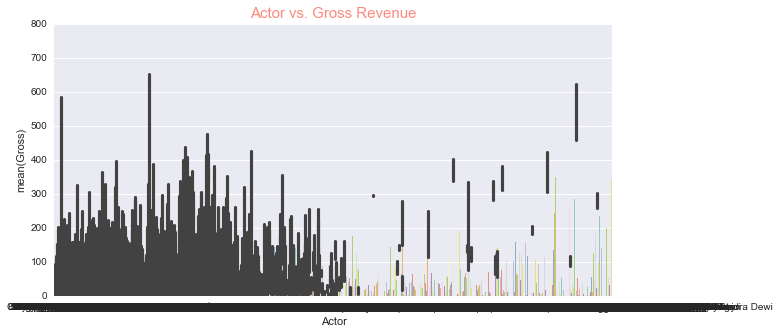

In [28]:
f, ax = plt.subplots(figsize = (10,5))
star_gross_plot = sns.barplot(x="Actor", y = "Gross", data = df_star_melt, palette = "Set3")
star_gross_plot.axes.set_title('Actor vs. Gross Revenue', fontsize=15,color="salmon",alpha=0.9)

In [31]:
df_star_melt['Value Counts'] = df_star_melt.groupby('Actor')['Actor'].transform('count')

In [ ]:
df_star_melt['Actor'].value_counts()

In [55]:

bins = [0,25,50]
group_names = ['Below 25','Above 25']
categories = pd.cut(df_star_melt['Value Counts'], bins, labels=group_names)
df_star_melt['Popularity of Actor'] = pd.cut(df_star_melt['Value Counts'], bins, labels=group_names)
categories.head(5)

0    Below 25
1    Below 25
2    Below 25
3    Below 25
4    Below 25
Name: Value Counts, dtype: category
Categories (2, object): [Above 25 < Below 25]

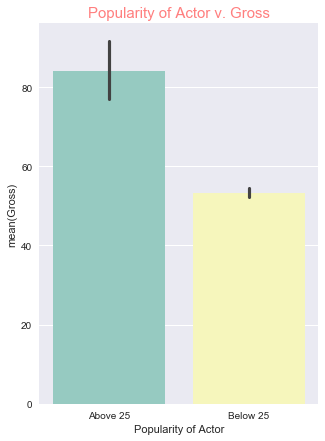

In [56]:
pd.value_counts(df_star_melt['Popularity of Actor'])

f, ax = plt.subplots(figsize=(5, 7))
FameActor = sns.barplot(x="Popularity of Actor", y="Gross", data=df_star_melt, palette="Set3")
FameActor.axes.set_title('Popularity of Actor v. Gross', fontsize=15,color="r",alpha=0.5)

## (7) provide your opinion on what makes a movie successful

-- Provide your solution

In [ ]:
As per observation of data and plots below are the key points which make a movie successful:
    
1.Higher budget movies i.e expensive special effects and extensive marketing.
2.Higher IMDB rating.
3.Having popular actor
4.Directed by a popular director


## Good Luck!